In [1]:
import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [2]:
import os
from langchain.agents import create_agent
from langchain_google_genai import ChatGoogleGenerativeAI
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
)

In [5]:
from langchain_tavily import TavilySearch

tavily_search_tool=TavilySearch(
    max_results=5,
    topic="general"
)

tavily_search_tool.invoke("What is the current news of AI as of Jan 2026?")

{'query': 'What is the current news of AI as of Jan 2026?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.marketingprofs.com/opinions/2026/54159/ai-update-january-9-2026-ai-news-and-views-from-the-past-three-weeks',
   'title': 'AI Update, January 9, 2026: AI News and Views From the Past ...',
   'content': 'Google updated Gemini for Google TV with Nano Banana and Veo models, enabling AI image and video generation directly on TVs. Users can remix',
   'score': 0.9997508,
   'raw_content': None},
  {'url': 'https://www.spglobal.com/market-intelligence/en/news-insights/research/2026/01/the-visible-alpha-ai-monitor-january-2026-update-whats-next-for-ai',
   'title': "The Visible Alpha AI Monitor January 2026 update: What's next for AI?",
   'content': 'The Visible Alpha AI Monitor aggregates publicly traded US technology companies, providing a comprehensive measure of the current state and',
   'score': 0.99959236,
   'raw_content': None},

In [6]:
from langchain.tools import tool
@tool("calculator", description="Perform arithmetc calculations. Use this for any math problem.")
def calc(expressions: str) -> str:
    return str(eval(expressions))

In [7]:
from langchain.agents import create_agent

agent=create_agent(
    model=model,
    tools=[tavily_search_tool, calc]
)

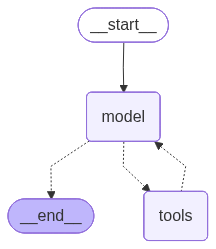

In [8]:
agent

In [13]:
user_input="What is the current AI news for Gemini? Calculate 15 + 16."

for step in agent.stream(
    {"messages": user_input},
    stream_mode="values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is the current AI news for Gemini? Calculate 15 + 16.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (483dbae9-8c36-4123-8bb0-67ba7b1d268a)
 Call ID: 483dbae9-8c36-4123-8bb0-67ba7b1d268a
  Args:
    query: AI news for Gemini
    topic: news
  calculator (958248f2-53d0-43fc-9c7a-1ce4a1b0fa89)
 Call ID: 958248f2-53d0-43fc-9c7a-1ce4a1b0fa89
  Args:
    expressions: 15 + 16
================================= Tool Message =================================
Name: calculator

31
================================== Ai Message ==================================

[{'type': 'text', 'text': 'Here\'s the latest AI news for Gemini:\n\n*   **Gemini API updates**: Increased file size limits and expanded input support, along with enhanced Veo 3.1 capabilities.\n*   **Google Search Integration**: Gemini 3 and Gen UI are integrated into Google Search, with prod